
#**Abandono de clientes de telecomunicaciones**
> Nombre del Dataset: Dataset-Telco-Customer-Churn.csv

> ## **Abstracto / Objetivo**<br>
Este análisis se centra en el comportamiento de los clientes de telecomunicaciones que tienen más probabilidades de abandonar la plataforma. 
La idea es descubrir el comportamiento de los clientes a través del analisis exploratorio de datos (EDA) y luego utilizar algunas de las técnicas de análisis predictivo para determinar los clientes que tienen más probabilidades de abandonar.

> ## **Contexto Comercial**<br>
La empresa "Telecomunicaciones" esta observando con mucho énfasis la creciente subida en la tasa de abandono de sus suscriptores, por ello se desea determinar cuales son las causas que han incidido en este aumento. Para esto se ha disponibilizado la información de sus suscriptores con sus características más relevantes y se ha instruido al equipo de data science que construya un modelo que permita identificar las causas principales de dicha bajas y así poder tomar las acciones correctivas para reducirla.

> ## **Problema Comercial**<br>
Para solucionar que problema planteado en la sección anterior se debe manipular el dataset, proporcionando análisis estadísticos, numéricos y las correspondientes visualizaciones para dar respuesta a lo descrito en el apartado de "Preguntas/hipótesis" expuesto más adelante.  


> ## **Contexto analítico**<br>
Se proporcionó un dataset llamado "Dataset-Telco-Customer-Churn.csv", delimitando los campos con el caracter coma ",", que se alojó en una carpeta de Google Drive llamada "Proyecto Data Science" que contiene las caracterisitca de los suscriptores de la empresa.<br><br>
>Las columnas contenidas son las siguientes:
*	customerID : >  ID del cliente
*	gender : si el cliente es hombre o mujer.
*	SeniorCitizen : si el cliente es una persona mayor o no (1, 0)
*	Partner : Si el cliente tiene socio o no (Sí, No)
*	Dependents : si el cliente tiene dependientes o no (Sí, No)
*	tenure : permanencia: Número de meses que el cliente ha permanecido en la empresa
*	PhoneService : si el cliente tiene un servicio telefónico o no (Sí, No)
*	MultipleLines : si el cliente tiene múltiples líneas o no (Sí, No, Sin servicio telefónico)
*	InternetService : proveedor de servicios de Internet del cliente (DSL, fibra óptica, No)
*	OnlineSecurity : si el cliente tiene seguridad en línea o no (Sí, No, Sin servicio de Internet)
*	OnlineBackup : si el cliente tiene copia de seguridad en línea o no (Sí, No, Sin servicio de Internet)
*	DeviceProtection : Si el cliente tiene protección de dispositivo o no (Sí, No, Sin servicio de Internet)
*	TechSupport : si el cliente tiene soporte técnico o no (Sí, No, Sin servicio de Internet)
*	StreamingTV : si el cliente tiene transmisión de TV o no (Sí, No, Sin servicio de Internet)
*	StreamingMovies : si el cliente tiene películas en streaming o no (Sí, No, Sin servicio de Internet)
*	Contract : el plazo del contrato del cliente (mes a mes, un año, dos años)
*	PaperlessBilling : si el cliente tiene o no facturación electrónica (Sí, No)
*	PaymentMethod : el método de pago del cliente (cheque electrónico, cheque enviado por correo, transferencia bancaria (automática), tarjeta de crédito (automática))
*	MonthlyCharges : la cantidad cargada al cliente mensualmente
*	TotalCharges : El monto total cobrado al cliente
*	Churn : si el cliente abandonó o no (Sí o No)

> ## **Preguntas/Hipótesis**<br>
1.  Determinar si la cantidad y el tipo de servicios contratados influye en la retencion del cliente.
2.   Determinar como se correlacionan las distintas variables del estudio con la duracion de los contratos y la retención.
3. Determinar si el aumento en los cargos incide en al tasa de abandono
4.   Predecir a través de un modelo si el cliente va a abandonar el servicio o no y cuales son las variables que mas influyen en la predicción.
5.   ¿Cuáles son los indicadores clave de la rotación de clientes? 
6. Demostrar que el aumento de los servicios contratados incide en la permanencia de los clientes
7.   ¿Qué estrategias de retención se pueden implementar en función de los resultados para disminuir la pérdida de clientes potenciales?

#**Análisis Exploratorio de Datos (EDA)**

##Instalación y carga de librerías a utilizar 

In [ ]:
!pip install funpymodeling

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Carga del dataset en formato .csv






In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive') 
%cd '/content/gdrive/MyDrive/ProyectoDataScience/'
df_churn = pd.read_csv('Dataset-Telco-Customer-Churn.csv',sep=',')
df_Original = pd.read_csv('Dataset-Telco-Customer-Churn.csv',sep=',')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/.shortcut-targets-by-id/1JBjZRPlZTm-Ax9WZx4quXsWlJqPbkKqm/ProyectoDataScience


##Entendiendo la data
##Mostar el Dataset Preliminar (Sin transformaciones)



In [ ]:
print('---------- HEAD ---------- ')
display(df_churn.head())
print('---------- DESCRIBE ---------- ')
display(df_churn.describe(include="all").T)
print('---------- SHAPE ---------- ')
display(df_churn.shape)
print('---------- INFO ---------- ')
display(df_churn.info())

---------- HEAD ---------- 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


---------- DESCRIBE ---------- 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---------- SHAPE ---------- 


(7043, 21)

---------- INFO ---------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilli

None

Este dataset incluye un total de 7,043 registros.



##Analisis resumido de las variables (Valores distintos)

In [ ]:
for variable in df_churn.columns:
    print(variable)
    print(df_churn[variable].unique(),"\n")

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

gender
['Female' 'Male'] 

SeniorCitizen
[0 1] 

Partner
['Yes' 'No'] 

Dependents
['No' 'Yes'] 

tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

PhoneService
['No' 'Yes'] 

MultipleLines
['No phone service' 'No' 'Yes'] 

InternetService
['DSL' 'Fiber optic' 'No'] 

OnlineSecurity
['No' 'Yes' 'No internet service'] 

OnlineBackup
['Yes' 'No' 'No internet service'] 

DeviceProtection
['No' 'Yes' 'No internet service'] 

TechSupport
['No' 'Yes' 'No internet service'] 

StreamingTV
['No' 'Yes' 'No internet service'] 

StreamingMovies
['No' 'Yes' 'No internet service'] 

Contract
['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling
['Yes' 'No'] 

PaymentMethod
['Electronic check' 'Mailed check' 'Bank tran

##Distribución de las variables en el dataset

In [ ]:
for col in df_churn:
    print('* * * * * * * * * *',col,'* * * * * * * * * *')
    print("Cantidad de Registros")
    print(df_churn[col].value_counts(ascending=True))
    print("Porcentaje (%)")
    print(df_churn[col].value_counts(normalize=True))
    print("Valores unicos")
    print(df_churn[col].unique(),"\n")
    print('******************************************')

* * * * * * * * * * customerID * * * * * * * * * *
Cantidad de Registros
7590-VHVEG    1
5956-YHHRX    1
5365-LLFYV    1
5855-EIBDE    1
8166-ZZTFS    1
             ..
1552-AAGRX    1
4304-TSPVK    1
0234-TEVTT    1
9755-JHNMN    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
Porcentaje (%)
7590-VHVEG    0.000142
3791-LGQCY    0.000142
6008-NAIXK    0.000142
5956-YHHRX    0.000142
5365-LLFYV    0.000142
                ...   
9796-MVYXX    0.000142
2637-FKFSY    0.000142
1552-AAGRX    0.000142
4304-TSPVK    0.000142
3186-AJIEK    0.000142
Name: customerID, Length: 7043, dtype: float64
Valores unicos
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

******************************************
* * * * * * * * * * gender * * * * * * * * * *
Cantidad de Registros
Female    3488
Male      3555
Name: gender, dtype: int64
Porcentaje (%)
Male      0.504756
Female    0.495244
Name: gender, dtype: float64
Valores unicos
['Female' 'Male'] 

***

##Contar valores NA por columna

In [ ]:
print(df_churn.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


##Eliminación de la columna del Id de cliente que no es relevante a estudio 

In [ ]:
df_churn.drop("customerID", axis=1, inplace=True)

>
##Tasa de abandono de clientes
Se seleccionó un grafico de tarta, ya que solo hay 2 clases y se representa más claramente la magnitud de cada uno.
>Se evidenció que casi 1/4 de los clientes ha abandonado de contrato. 

([<matplotlib.patches.Wedge at 0x7f7c75688760>,
 [Text(-0.7393678277834757, 0.8144539368428056, 'No'),
  Text(0.7393677515287918, -0.8144540060674139, 'Yes')],
 [Text(-0.4032915424273503, 0.44424760191425755, '73.5%'),
  Text(0.4032915008338864, -0.4442476396731348, '26.5%')])

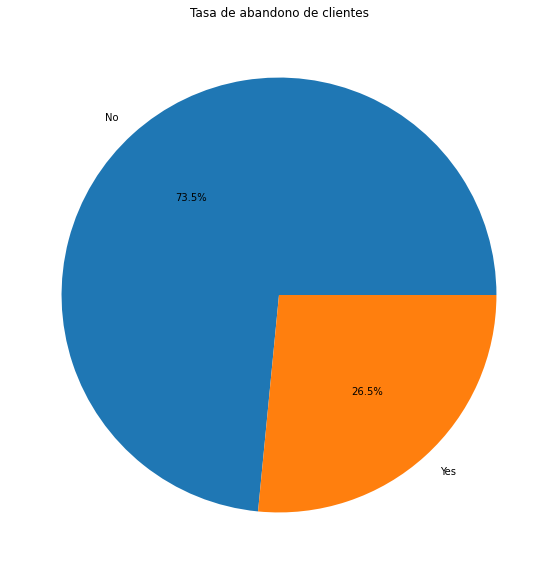

In [ ]:
sizes = df_churn['Churn'].value_counts(sort = True)
labels = np.unique(df_churn.Churn)

plt.figure(figsize = (10,10))
plt.title("Tasa de abandono de clientes")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')

##Distribución de la permanencia

> Según la informacion la mayoría de los clientes que abandonaron estuvieron  en la empresa menos de 20 meses, a medida que aumenta la permanencia la probabilidad de abandonar disminuye.

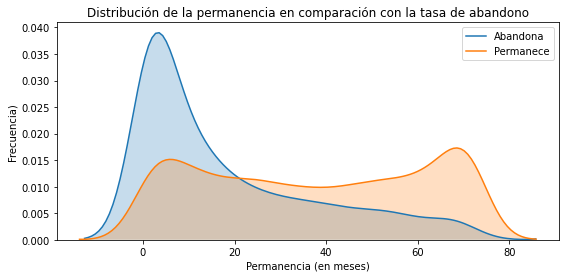

In [ ]:
plt.figure(figsize = (9,4))
g = sns.kdeplot(df_churn.tenure[(df_churn["Churn"] == "Yes") ], shade = True)
g = sns.kdeplot(df_churn.tenure[(df_churn["Churn"] == "No") ], shade= True)
g.set_xlabel("Permanencia (en meses)")
g.set_ylabel("Frecuencia)")
plt.title('Distribución de la permanencia en comparación con la tasa de abandono')
g = g.legend(["Abandona","Permanece"])

##Visualización de Genero
> Según la informacion no se aprecia ninguna variación importante con respecto al sexo.

(array([3488.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3555.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

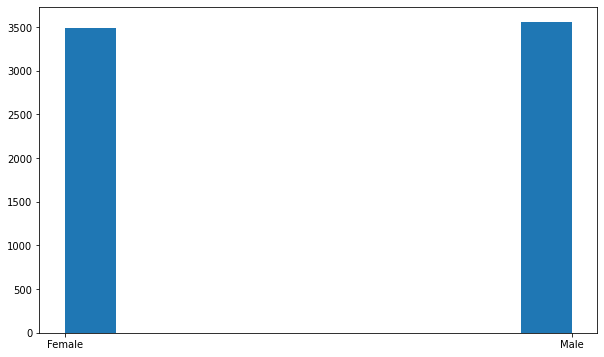

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
plt.hist(df_churn["gender"])

##Comportamiento general de las variables
> Usado para una exploración rapida de los datos, observando algunas variaciones importantes en cuanto a los que son dependientes ó poseen linea teléfonica adicional

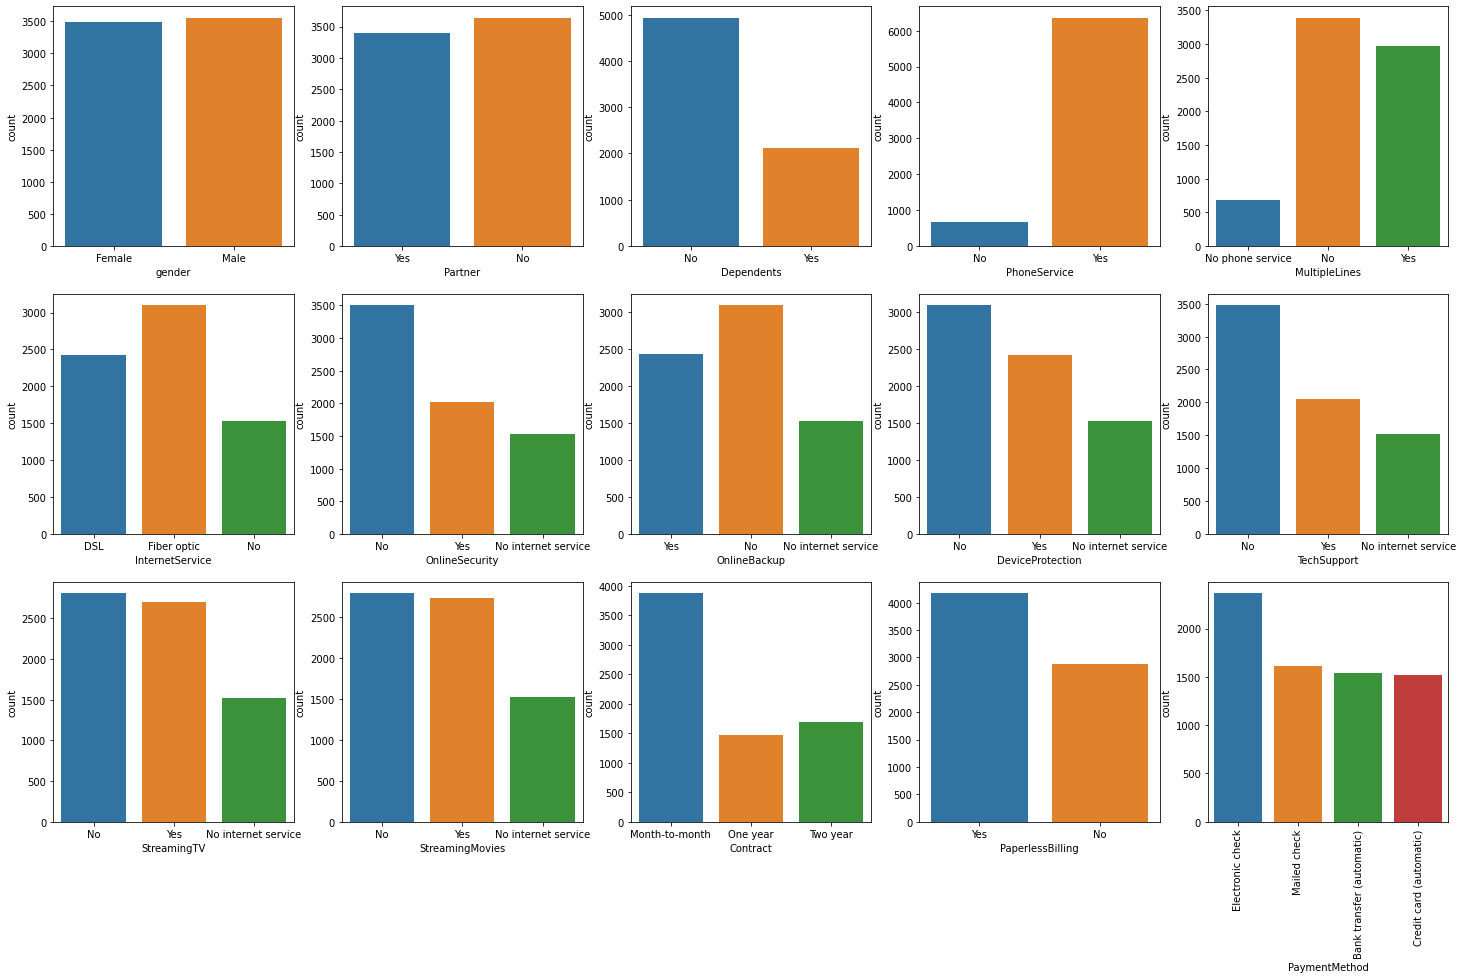

In [ ]:
fig, axes = plt.subplots(nrows = 3,ncols = 5,figsize = (25,15))
sns.countplot(x = "gender", data = df_churn, ax=axes[0][0])
sns.countplot(x = "Partner", data = df_churn, ax=axes[0][1])
sns.countplot(x = "Dependents", data = df_churn, ax=axes[0][2])
sns.countplot(x = "PhoneService", data = df_churn, ax=axes[0][3])
sns.countplot(x = "MultipleLines", data = df_churn, ax=axes[0][4])
sns.countplot(x = "InternetService", data = df_churn, ax=axes[1][0])
sns.countplot(x = "OnlineSecurity", data = df_churn, ax=axes[1][1])
sns.countplot(x = "OnlineBackup", data = df_churn, ax=axes[1][2])
sns.countplot(x = "DeviceProtection", data = df_churn, ax=axes[1][3])
sns.countplot(x = "TechSupport", data = df_churn, ax=axes[1][4])
sns.countplot(x = "StreamingTV", data = df_churn, ax=axes[2][0])
sns.countplot(x = "StreamingMovies", data = df_churn, ax=axes[2][1])
sns.countplot(x = "Contract", data = df_churn, ax=axes[2][2])
sns.countplot(x = "PaperlessBilling", data = df_churn, ax=axes[2][3])
ax = sns.countplot(x = "PaymentMethod", data = df_churn, ax=axes[2][4])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig)

##Relación de Genero y Seniority
> Se evidencia que en su mayoría son mujeres pero tampoco nada significativo. 

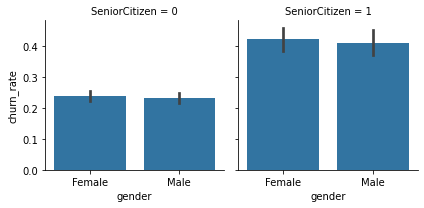

In [ ]:
df_churn['churn_rate'] = df_churn['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(df_churn, col="SeniorCitizen")
ax = g.map(sns.barplot, "gender", "churn_rate", order= ['Female', 'Male'])

##Casteo de los datos
> Cambio de los tipos de datos y valores a booleanos para poder analizarlos

In [ ]:
df_churn.gender = [1 if x == "Male" else 0 for x in df_churn.gender]
for col in ('Partner', 'Dependents', 'PhoneService' , 'OnlineSecurity',
        'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV',
        'StreamingMovies','PaperlessBilling','MultipleLines','Churn'):
    df_churn[col] = [1 if x == "Yes" else 0 for x in df_churn[col]]        
df_churn.head(10)  

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_rate
0,0,0,1,0,1,0,0,DSL,0,1,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,0
1,1,0,0,0,34,1,0,DSL,1,0,...,0,0,0,One year,0,Mailed check,56.95,1889.5,0,0
2,1,0,0,0,2,1,0,DSL,1,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1
3,1,0,0,0,45,0,0,DSL,1,0,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1
5,0,0,0,0,8,1,1,Fiber optic,0,0,...,0,1,1,Month-to-month,1,Electronic check,99.65,820.5,1,1
6,1,0,0,1,22,1,1,Fiber optic,0,1,...,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.4,0,0
7,0,0,0,0,10,0,0,DSL,1,0,...,0,0,0,Month-to-month,0,Mailed check,29.75,301.9,0,0
8,0,0,1,0,28,1,1,Fiber optic,0,0,...,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1,1
9,1,0,0,1,62,1,0,DSL,1,1,...,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0,0


##Incidencia de los cargos (mensuales y totales) en la tasa de abandono

In [ ]:
df_churn['TotalCharges'] = pd.to_numeric(df_churn.TotalCharges, errors='coerce')
df_churn['Churn'] = pd.to_numeric(df_churn.Churn, errors='coerce')
df_churn['MonthlyCharges'] = pd.to_numeric(df_churn.MonthlyCharges, errors='coerce')
df_churn['tenure'] = pd.to_numeric(df_churn.tenure, errors='coerce')

In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 



---------- Incidencia de los cargos (Mensuales y Totales) en la tasa de abandono ----------
Churn
0    61.265124
1    74.441332
Name: MonthlyCharges, dtype: float64 

Churn
1    1531.796094
0    2555.344141
Name: TotalCharges, dtype: float64 



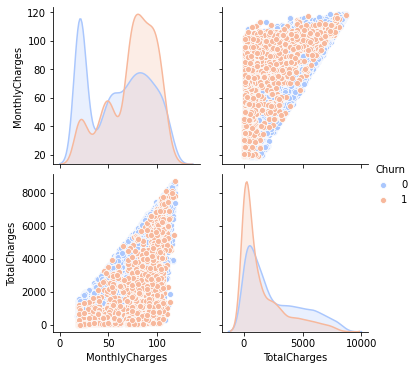

In [ ]:
print(f'\n---------- Incidencia de los cargos (Mensuales y Totales) en la tasa de abandono ----------')
print(df_churn.groupby(by=['Churn'])['MonthlyCharges'].mean().sort_values(), '\n')
print(df_churn.groupby(by=['Churn'])['TotalCharges'].mean().sort_values(), '\n')

datos_1 = ['MonthlyCharges','TotalCharges', 'Churn']
sns.pairplot(df_churn[datos_1], hue = 'Churn', palette='coolwarm')

*Segun el grafico anterior podemos deducir en cuanto al cargo mensual a medida que aumenta esta variable aumenta el abandono, y inversamente sucede con el cargo total, porque se acumula con la antiguedad (estas variables juntas no arrojan ninguna información relevante)*

##Determinar si la cantidad y el tipo de servicios contratados influye en la retencion del cliente.


---------- Incidencia de la cantidad de servicios contratados en la tasa de abandono ----------


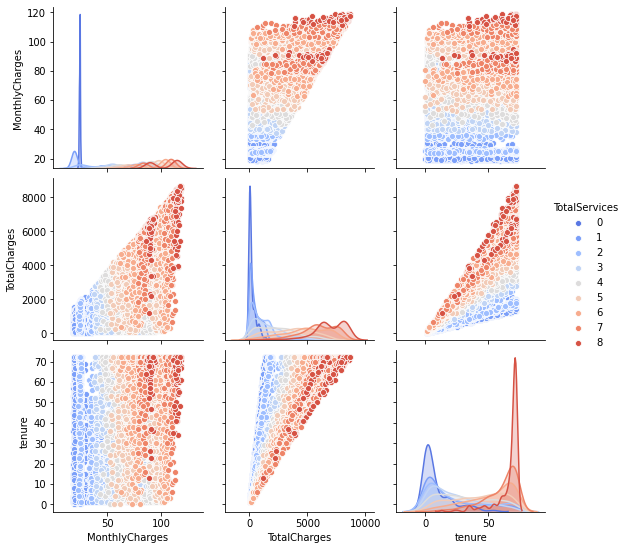

In [ ]:
print(f'\n---------- Incidencia de la cantidad de servicios contratados en la tasa de abandono ----------')
df_churn['TotalServices'] = df_churn['PhoneService'] + df_churn['MultipleLines'] + df_churn['OnlineSecurity'] + df_churn['OnlineBackup'] + df_churn['DeviceProtection']+ df_churn['TechSupport'] + df_churn['StreamingTV'] + df_churn['StreamingMovies']
datos_2 = ['MonthlyCharges','TotalCharges','tenure','TotalServices']
sns.pairplot(df_churn[datos_2], hue = 'TotalServices', palette='coolwarm')

*En el grafico anterior, tratamos de mostrar como la cantidad de servicios contratados influiría en la permanencia del suscriptor, como que por la informacion analizada no crea una tendencia paraticular que se pueda analizar a fondo para demostrar esta influencia, en la primera linea solo vemos que a menor cantidad de serivicos el cargo mensual es menor con ciertos datos que estan fuera del promedio a excepción de algunos clientes con 4 servicios contratados que estan teniendo unos cargos superiores a la media, en la segunda linea de graficos el comportamiento con respecto al total de cargos es similar al anterior pero sin destacar nada adicional y con respecto a la permanencia pordemos inferir que con respecto a esta variable (Permanencia) a medida que aumenta esta aumentan los cargos. (mesuales y totales)*

---------- Servicios contratados vs. la retencion del cliente ---------- 
TotalServices
0     8.887500
1    20.945914
2    24.336700
3    24.489119
4    32.054230
5    41.452643
6    51.050296
7    59.759494
8    66.336538
Name: tenure, dtype: float64 


---------- Analisis de servicios contratados ----------
PhoneService  MultipleLines
1             0                24.134808
0             0                31.737537
1             1                41.914507
Name: tenure, dtype: float64

---------- Analisis de servicios de streaming ----------
StreamingTV  StreamingMovies
0            0                  25.742946
1            0                  31.559322
0            1                  32.311869
1            1                  44.824742
Name: tenure, dtype: float64


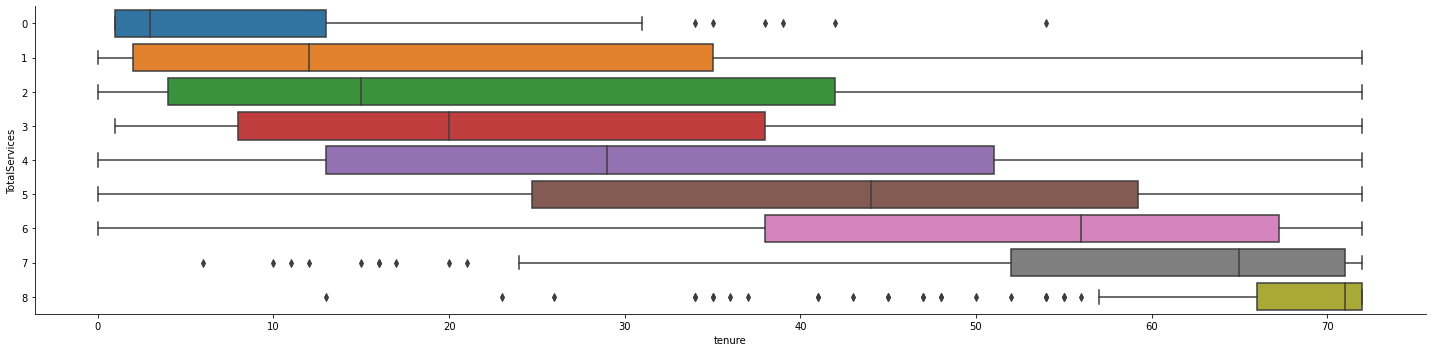

In [ ]:
#Determinar si la cantidad y el tipo de servicios contratados influye en la retencion del cliente.
print('---------- Servicios contratados vs. la retencion del cliente ---------- ')
print(df_churn.groupby(by=['TotalServices'])['tenure'].mean().sort_values(), '\n')

#Analisis de servicios adicionales
print(f'\n---------- Analisis de servicios contratados ----------')
print(df_churn.groupby(by=['PhoneService', 'MultipleLines'])['tenure'].mean().sort_values())

#Incidencia de los servicios de streaming
print(f'\n---------- Analisis de servicios de streaming ----------')
print(df_churn.groupby(by=['StreamingTV', 'StreamingMovies'])['tenure'].mean().sort_values())

ax = sns.catplot(y="TotalServices", x="tenure", kind="box",  data=df_churn, height=5, aspect=4, orient='h')

*Podemos decir con este gráfico que mientras mayor es la catidad de servicios contratados mayor es la permanencia*

##Comportamiento de las variables: Permanencia, Cargo mensual y cargos totales
> De aqui se puede destacar que a medida que la factura es mayor existes menos suscriptores


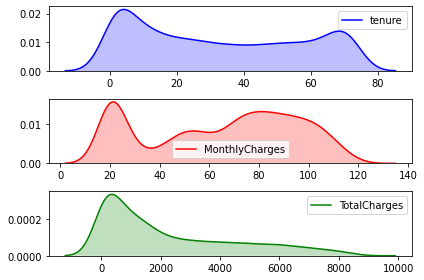

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
sns.kdeplot(df_churn["tenure"], shade=True, color="b",ax = ax1)
sns.kdeplot(df_churn["MonthlyCharges"], shade=True, color="r", ax = ax2)
sns.kdeplot(df_churn["TotalCharges"], shade=True, color="g", ax = ax3)
fig.tight_layout()
plt.show(fig)

##Relación entre medios de pago y abadono


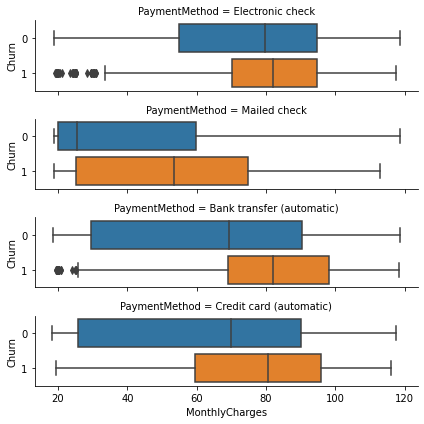

In [ ]:
ax = sns.catplot(y="Churn", x="MonthlyCharges", row="PaymentMethod", kind="box", data=df_churn, height=1.5, aspect=4, orient='h')

En el gráfico anterior, no observamos nada particular con respecto a los métodos de pago, por ello estudiaremos más a fondo estas variables para ver si conseguimos algo sobresaliente, lo desglosaremos por género.


---------- Comportamiento de los pagos de acuerdo al genero ----------
PaymentMethod
Bank transfer (automatic)    0.489637
Electronic check             0.505285
Credit card (automatic)      0.505913
Mailed check                 0.517370
Name: gender, dtype: float64 

PaymentMethod              gender
Mailed check               1         1024.702533
                           0         1086.340387
Electronic check           0         2017.955684
                           1         2162.255314
Credit card (automatic)    1         3031.106948
Bank transfer (automatic)  0         3064.537802
                           1         3094.686954
Credit card (automatic)    0         3112.704394
Name: TotalCharges, dtype: float64


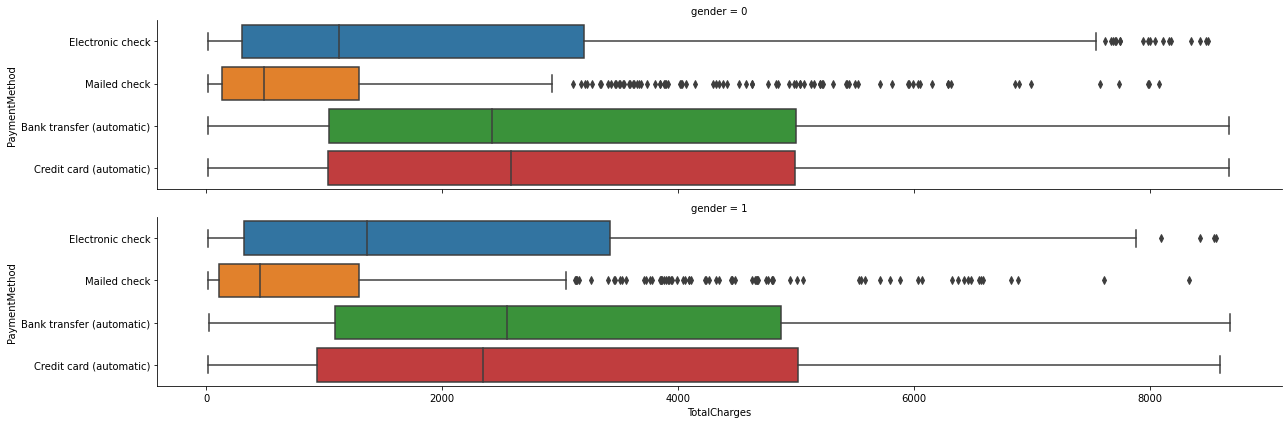

In [ ]:
#Comportamiento de los pagos de acuerdo al genero
print(f'\n---------- Comportamiento de los pagos de acuerdo al genero ----------')
print(df_churn.groupby(by=['PaymentMethod'])['gender'].mean().sort_values(), '\n')

print(df_churn.groupby(by=['PaymentMethod', 'gender'])['TotalCharges'].mean().sort_values())

ax = sns.catplot(y="PaymentMethod", x="TotalCharges", row="gender", kind="box",  data=df_churn, height=3, aspect=6, orient='h')

*No existe una variación significativa del comportamiento de pagos de acuerdo al genero, solo que los paos automaticos son mayores a los que no son automaticos y el menos utilizado es el cheque.*

##Visualizaciones y Resúmenes numéricos básicos acordes con los tipos de variables disponibles.


Text(0, 0.5, 'Factor de correlación')

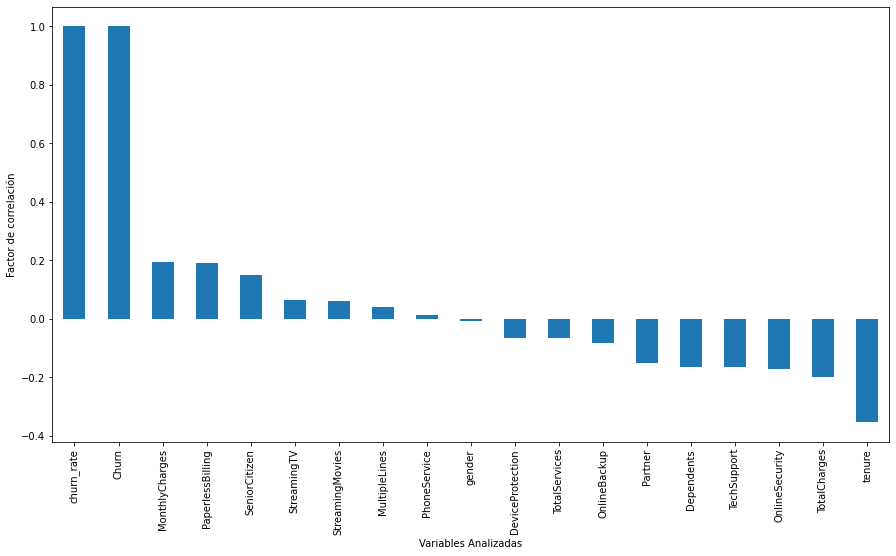

In [ ]:
#2.- Determinar como se correlacionan las distintas variables del estudio con la duracion de los contratos y la retención
plt.figure(figsize=(15,8))
df_churn.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.xlabel('Variables Analizadas')
plt.ylabel('Factor de correlación')

*Para mostrar cuales variables inciden positiva o negativamente sobre la viariable objetivo*

## Resumen numérico con los tipos de variables

Calculemos los cargos mensuales promedio de cada categoría en las funciones de soporte técnico y seguridad en línea.

In [ ]:
print(df_churn.groupby(by=['TechSupport'])['MonthlyCharges'].mean().sort_values(), '\n')
print(df_churn.groupby(by=['OnlineSecurity'])['MonthlyCharges'].mean().sort_values(), '\n')
print(df_churn.groupby(by=['OnlineSecurity', 'TechSupport'])['MonthlyCharges'].mean().sort_values())

TechSupport
0    58.252931
1    80.680137
Name: MonthlyCharges, dtype: float64 

OnlineSecurity
0    59.104538
1    78.838732
Name: MonthlyCharges, dtype: float64 

OnlineSecurity  TechSupport
0               0              54.319625
1               0              75.692011
0               1              79.758148
1               1              81.472930
Name: MonthlyCharges, dtype: float64


*Ambos servicios no parecen afectar mucho los cargos de suscripción y dado que la mayoría de los clientes no se suscriben a esos servicios podrian tener un impacto significativo en la retención de clientes*

*Veamos si la tasa de abandono se reduce significativamente para los clientes que tienen acceso a ambos servicios.*

In [ ]:
print(df_churn.groupby(by=['TechSupport'])['OnlineSecurity'].value_counts(), '\n')

TechSupport  OnlineSecurity
0            0                 4079
             1                  920
1            1                 1099
             0                  945
Name: OnlineSecurity, dtype: int64 



> ##**Recomendaciones:**

* Aumentar la cantidad de pack de servicios y ofrecerlos juntos ya que a mayor cantidad de serivición, mayor es la permanencia.

* Ofrecer descuentos en planes de suscripción anual.

* Incentivar las suscripciones con cargo a tarjetas de credito.

#**Desafío complementario - "Evaluando modelos ML"**

In [ ]:
df_churn.fillna(0, inplace=True)

from sklearn.model_selection import train_test_split

X = df_churn[['SeniorCitizen','Partner','tenure','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','MonthlyCharges','TotalCharges','TotalServices']]

y = df_churn.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

display (X_train.head(5), X_test.head(5))

,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,TotalServices
1814,0,1,12,1,0,0,0,0,0,0,0,0,19.70,258.35,1
5946,0,0,42,1,0,1,1,1,1,0,1,0,73.90,3160.55,6
3881,0,1,71,1,1,1,1,0,1,0,0,0,65.15,4681.75,5
2389,0,1,71,1,1,1,0,1,1,1,1,0,85.45,6300.85,7
3676,0,0,30,1,0,1,1,0,1,1,0,0,70.40,2044.75,5


,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,TotalServices
3381,0,0,41,1,0,1,0,1,1,1,1,1,79.85,3320.75,6
6180,1,0,66,1,1,1,0,0,0,1,1,1,102.40,6471.85,5
4829,0,0,12,1,0,0,0,0,0,0,0,1,45.00,524.35,1
3737,0,0,5,1,1,0,0,0,0,0,0,1,50.60,249.95,2
4249,0,1,10,1,0,0,1,1,0,0,1,1,65.90,660.05,4


## Clasificación / Regresión Logística
> Algoritmo - Métricas - Conclusiones



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logr = LogisticRegression()

logr.fit(X_train,y_train)

y_pred = logr.predict(X_test)

print('accuracy', accuracy_score(y_test, y_pred))
print('confusion_matrix', confusion_matrix(y_test, y_pred))
print('classification', classification_report(y_test, y_pred))


accuracy 0.8048261178140526
confusion_matrix [[943 118]
 [157 191]]
classification               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1061
           1       0.62      0.55      0.58       348

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



## Clasificación / KNeighbors
> Algoritmo - Métricas - Conclusiones

In [ ]:
from matplotlib.cbook import print_cycles
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

print('accuracy', accuracy_score(y_test, y_pred))
print('confusion_matrix', confusion_matrix(y_test, y_pred))
print('classification', classification_report(y_test, y_pred))

accuracy 0.7892122072391767
confusion_matrix [[990  71]
 [226 122]]
classification               precision    recall  f1-score   support

           0       0.81      0.93      0.87      1061
           1       0.63      0.35      0.45       348

    accuracy                           0.79      1409
   macro avg       0.72      0.64      0.66      1409
weighted avg       0.77      0.79      0.77      1409



##Overfitting & Underfitting

In [ ]:
y_pred_train = logr.predict(X_train)

print('accuracy', accuracy_score(y_train, y_pred_train))

accuracy 0.7988995385161519


In [ ]:
 #cross-validation en una regresión logística

from sklearn.model_selection import cross_val_score

# Calcular la puntuación de la validación cruzada con 5 divisiones
scores = cross_val_score(logr, X, y, cv=5)

# Imprimir la puntuación media y la desviación estándar de la precisión
print("Precisión media:", np.mean(scores))
print("Desviación estándar:", np.std(scores))




Precisión media: 0.7996593530227757
Desviación estándar: 0.0034521240201180075


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crear una regresión logística con regularización L1
model_l1 = LogisticRegression(penalty='none')
model_l1.fit(X_train, y_train)

# Crear una regresión logística con regularización L2
model_l2 = LogisticRegression(penalty='l2')
model_l2.fit(X_train, y_train)

# Hacer predicciones con los modelos
y_pred_l1 = model_l1.predict(X_test)
y_pred_l2 = model_l2.predict(X_test)

# Calcular la precisión de cada modelo
acc_l1 = accuracy_score(y_test, y_pred_l1)
acc_l2 = accuracy_score(y_test, y_pred_l2)

# Imprimir las precisions
print("Precisión (L1):", acc_l1)
print("Precisión (L2):", acc_l2)

Precisión (L1): 0.7913413768630234
Precisión (L2): 0.7913413768630234


In [ ]:
from sklearn.utils import check_random_state

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crear una semilla aleatoria para la reproducibilidad
rs = check_random_state(0)

# Crear una regresión logística con early stopping
model = LogisticRegression(random_state=rs)
n_iter = 0
max_iter = 50
prev_acc = 0
tol = 0.0001

for i in range(max_iter):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    if (prev_acc > acc + tol):
        break
    prev_acc = acc
    n_iter = i

# Imprimir el número de iteraciones
print("Número de iteraciones:", n_iter)

Número de iteraciones: 49


#Conclusiones

Adicional al metodo visto en clase, se procedio a realizar adicionalmente otros metodos para verificar si hay Overfitting ó Underfitting en nuestros datos, los metodos utilizados fueron los siguientes: 
* Cross-Validation
  > Resultados
> * Precisión media: 0.7996593530227757
> * Desviación estándar: 0.0034521240201180075

Este metodo hace uso de la función cross_val_score de scikit-learn para calcular la precisión media y la desviación estándar de la precisión de la regresión logística utilizando la cross-validation con 5 divisiones (cv=5). Esto te permite evaluar el rendimiento del modelo en diferentes partes de los datos y detectar posibles overfitting o underfitting.

* Regularización L1 y L2
  > Resultados
> * Precisión (L1): 0.8126330731014905
> * Precisión (L2): 0.8147622427253371

  En este metodo, primero se cargan los datos y se dividen en características (X) y etiquetas (y). Luego, se dividen los datos en conjuntos de entrenamiento y prueba. Después, se crean dos modelos de regresión logística, uno con regularización L1 (penalty='l1') y otro con regularización L2 (penalty='l2'). Finalmente, se hacen predicciones con cada modelo y se calcula la precisión. 

Esto te permite comparar el rendimiento de la regresión logística con diferentes tipos de regularización y elegir el que mejor se ajuste a tus datos.

* Early Stopping
  > Resultados
> * Número de iteraciones: 49

Para este metodo, se crea un modelo de regresión logística con una semilla aleatoria fija para la reproducibilidad. Finalmente, se hacen ajustes iterativos del modelo y se comparan las precisiones. Si la precisión disminuye más de una tolerancia dada, el bucle se detiene. Esto te permite evitar el sobreajuste y detener el entrenamiento temprano si el modelo ya no está mejorando su rendimiento.

En general luego de utilizados los tres métodos observamos que no existe una variación significativa en los datos por lo que podemos concluir que no existe un sobreajuste ó subajuste en los datos, en las dos primeras técnicas los valores arrojados son similares a los obtenidos inicialmente, y con respecto al Early Stopping este fue el que menos arrojó resultados, se intento hasta con 500 iteraciones y no se logró determinar ninguna variación en la precisión.


De acuerdo a esto ya que no se puede determinar a ciencia cierta si el modelos sobre o sub ajustado y de acuerdo a la naturaleza de los datos, seria necesario aplicar otros enfoques o técnicas para encontrar una mejor solución, se podría intentar con otros modelos no lineales,  o utilizar técnicas de selección de características que permitan identificar y seleccionar solo las características más importantes para el modelo
